In [1]:
import pandas as pd # Used for dataframe functions
import json # parse json string
import nltk # Natural language toolkit for TDIDF etc.
from bs4 import BeautifulSoup # Parse html string .. to extract text
import re # Regex parser 
import numpy as np # Linear algebbra 
from sklearn import * # machine learning
import matplotlib.pyplot as plt # Visualization
from wordcloud import WordCloud # Word cloud visualization
import scipy #Sparse matrix 

np.set_printoptions(precision=4)

%matplotlib inline 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

Run the following once

In [2]:
# nltk.download("punkt")
# nltk.download("stopwords")

In [3]:
#import requests
#url = "https://raw.githubusercontent.com/abulbasar/machine-learning/master/Utils.py"
#exec(requests.get(url).text)

In [4]:
print(nltk.__version__)

3.2.5


In [5]:
# The following line does not work on Windows system
!head -n 1 /data/imdb-comments.json

{"label":"test","sentiment":"pos","name":"0_10.txt","content":"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."}


In [6]:
data = []
with open("/data/imdb-comments.json", "r", encoding="utf8") as f:
    for l in f.readlines():
        data.append(json.loads(l))    

In [7]:
comments = pd.DataFrame.from_dict(data)
comments.sample(10)

,content,label,name,sentiment
30328,"One of the best musicals ever made, this is an...",train,3546_10.txt,pos
36927,"Finally a thriller which omits the car chases,...",train,9486_10.txt,pos
41812,A bum gives a Secret Serviceman a tip about a ...,train,2631_1.txt,neg
14696,So im not a big fan of Boll's work but then ag...,test,11978_3.txt,neg
3152,Luchino Visconti has become famous to the worl...,test,1588_7.txt,pos
18947,This might very well be the worst movie I've s...,test,4553_2.txt,neg
44519,I am stunned to discover the amount of fans th...,train,5068_4.txt,neg
28542,"I don't know why I picked this movie to watch,...",train,1939_8.txt,pos
42411,There have been some funny movies about spirit...,train,3170_3.txt,neg
10664,"Since watching the trailer in ""The Little Merm...",test,8349_10.txt,pos


In [8]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
content      50000 non-null object
label        50000 non-null object
name         50000 non-null object
sentiment    50000 non-null object
dtypes: object(4)
memory usage: 1.5+ MB


In [9]:
comments.label.value_counts()

train    25000
test     25000
Name: label, dtype: int64

In [10]:
comments.groupby(["label", "sentiment"]).content.count().unstack()

sentiment,neg,pos
label,,
test,12500,12500
train,12500,12500


In [11]:
np.random.seed(1)
v = list(comments["content"].sample(1))[0]
v

'When we started watching this series on cable, I had no idea how addictive it would be. Even when you hate a character, you hold back because they are so beautifully developed, you can almost understand why they react to frustration, fear, greed or temptation the way they do. It\'s almost as if the viewer is experiencing one of Christopher\'s learning curves.<br /><br />I can\'t understand why Adriana would put up with Christopher\'s abuse of her, verbally, physically and emotionally, but I just have to read the newspaper to see how many women can and do tolerate such behavior. Carmella has a dream house, endless supply of expensive things, but I\'m sure she would give it up for a loving and faithful husband - or maybe not. That\'s why I watch.<br /><br />It doesn\'t matter how many times you watch an episode, you can find something you missed the first five times. We even watch episodes out of sequence (watch season 1 on late night with commercials but all the language, A&E with lang

In [12]:
def preprocess(text):
    
    # Remove html tags
    text = BeautifulSoup(text.lower(), "html5lib").text 
    
    # Replace the occurrences of multiple consecutive whilespaces 
    # with a single space (" ")
    text = re.sub(r"[\W]+", " ", text)
    return text

preprocess(v)

'when we started watching this series on cable i had no idea how addictive it would be even when you hate a character you hold back because they are so beautifully developed you can almost understand why they react to frustration fear greed or temptation the way they do it s almost as if the viewer is experiencing one of christopher s learning curves i can t understand why adriana would put up with christopher s abuse of her verbally physically and emotionally but i just have to read the newspaper to see how many women can and do tolerate such behavior carmella has a dream house endless supply of expensive things but i m sure she would give it up for a loving and faithful husband or maybe not that s why i watch it doesn t matter how many times you watch an episode you can find something you missed the first five times we even watch episodes out of sequence watch season 1 on late night with commercials but all the language a e with language censored reruns on the movie network whenever 

In [13]:
%%time
# Apply the preprocessing logic to all comments
comments["content"] = comments["content"].apply(preprocess)

CPU times: user 1min 47s, sys: 647 ms, total: 1min 48s
Wall time: 1min 56s


In [14]:
comments_train = comments[comments["label"] == "train"]
comments_train.sample(10)

,content,label,name,sentiment
25496,there are many people in our lives that we mee...,train,10447_10.txt,pos
41520,sixth escapade for freddy krueger in which he ...,train,2369_4.txt,neg
48525,the first few minutes of the bodyguard do have...,train,8674_2.txt,neg
26037,after reviewing this intense martial arts movi...,train,10934_10.txt,pos
43823,triumph of love is proof that not every coméd...,train,4441_3.txt,neg
39666,this is without a doubt the worst movie i have...,train,11950_2.txt,neg
40882,i had the opportunity to preview this film as ...,train,1795_2.txt,neg
43156,roeg has done some great movies but this a tur...,train,3841_1.txt,neg
37185,possible spoiler in some way how to alienate f...,train,9718_7.txt,pos
40330,sogo ishii can be a skilled filmmaker under th...,train,1298_3.txt,neg


In [15]:
comments_test = comments[comments["label"] == "test"]
comments_test.sample(10)

,content,label,name,sentiment
21277,this is one of those movies where i was rootin...,test,6650_1.txt,neg
12620,spoilersi m going to be as kind as i can about...,test,10108_1.txt,neg
4485,as a former erasmus student i enjoyed this fil...,test,2788_9.txt,pos
4744,francis ford coppola s masterpiece was a great...,test,301_10.txt,pos
10329,some of the reviewers here have foolishly judg...,test,8047_10.txt,pos
14366,this is by far one of the most pretentious fil...,test,11680_1.txt,neg
1007,this is truly a funny movie his dance scene do...,test,10907_8.txt,pos
4539,this film released in 1951 has the usual eleme...,test,2836_8.txt,pos
7864,one of the best tv shows out there if not the ...,test,5829_10.txt,pos
19582,this movie was jerry bruckheimer s idea to sel...,test,5124_4.txt,neg


In [16]:
X_train = comments_train["content"].values
y_train = np.where(comments_train.sentiment == "pos", 1, 0)

In [17]:
X_test = comments_test["content"].values
y_test = np.where(comments_test.sentiment == "pos", 1, 0)

In [18]:
# http://snowball.tartarus.org/algorithms/porter/stemmer.html
porter = nltk.stem.porter.PorterStemmer()
for s in nltk.word_tokenize("""revival allowance inference 
            relational runner runs ran"""):
    print(s, porter.stem(s))

revival reviv
allowance allow
inference infer
relational relat
runner runner
runs run
ran ran


In [19]:
def my_tokenizer(s):
    terms = [porter.stem(w) for w in nltk.word_tokenize(s)]
    terms = [term for term in terms if len(term) > 2]
    return terms 
my_tokenizer("The sun is shining. Allowance")

['the', 'sun', 'shine', 'allow']

In [20]:
stopwords = nltk.corpus.stopwords.words("english")
tfidf = feature_extraction.text.TfidfVectorizer(tokenizer=my_tokenizer, 
                    ngram_range=(1, 1), stop_words = stopwords)

docs = ["The sun is shining", 
        "The weather is sweet", 
        "the sun is shining and the weather is sweet"]

doc_term_matrix = tfidf.fit_transform(docs)
print("Vocabulary: ", tfidf.vocabulary_) 
print("TFIDF matrix: \n", doc_term_matrix.toarray())
print("Type of doc_term_matrix", type(doc_term_matrix))
# returns term and index in the feature matrix

Vocabulary:  {'sun': 1, 'shine': 0, 'weather': 3, 'sweet': 2}
TFIDF matrix: 
 [[0.7071 0.7071 0.     0.    ]
 [0.     0.     0.7071 0.7071]
 [0.5    0.5    0.5    0.5   ]]
Type of doc_term_matrix <class 'scipy.sparse.csr.csr_matrix'>


In [21]:
print(len(stopwords), stopwords)

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [22]:
%%time
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

CPU times: user 6min 10s, sys: 1.16 s, total: 6min 11s
Wall time: 7min 41s


In [23]:
X_test_tfidf.shape, y_test.shape, X_train_tfidf.shape, y_train.shape

((25000, 51575), (25000,), (25000, 51575), (25000,))

Let's estimate the memory requirment if the data is presented in dense matrix format

In [24]:
cell_count = np.product(X_train_tfidf.shape)
bytes = cell_count * 4 
GBs = bytes / (1024 ** 3) 
GBs

4.8032961785793304

In [25]:
sparsity = 1 - X_train_tfidf.count_nonzero() / cell_count
sparsity

0.9981450679592826

In [26]:
1 - X_train_tfidf.nnz / cell_count

0.9981450679592826

Byte size of the training doc sparse doc

In [27]:
print(X_train_tfidf.data.nbytes / (1024.0 ** 3), "GB")

0.01781957596540451 GB


# Important terms for a document 

In [28]:
vocab_by_term = tfidf.vocabulary_
vocab_by_idx = dict({(vocab_by_term[term], term) 
                                 for term in vocab_by_term})

In [29]:
str(vocab_by_term)[:100]

"{'bromwel': 6709, 'high': 20966, 'cartoon': 7840, 'comedi': 9661, 'ran': 36781, 'time': 45789, 'prog"

In [30]:
str(vocab_by_idx)[:100]

"{31160: 'natch', 9477: 'codswallop', 26620: 'linguin', 10363: 'corros', 7478: 'camoletti', 25618: 'l"

In [31]:
idx = 5
print("Content:\n", X_train[idx])
row = X_train_tfidf[idx]
terms = [(vocab_by_idx[row.indices[i]], row.data[i])
             for i, term in enumerate(row.indices)]
pd.Series(dict(terms)).sort_values(ascending = False)

Content:
 this isn t the comedic robin williams nor is it the quirky insane robin williams of recent thriller fame this is a hybrid of the classic drama without over dramatization mixed with robin s new love of the thriller but this isn t a thriller per se this is more a mystery suspense vehicle through which williams attempts to locate a sick boy and his keeper also starring sandra oh and rory culkin this suspense drama plays pretty much like a news report until william s character gets close to achieving his goal i must say that i was highly entertained though this movie fails to teach guide inspect or amuse it felt more like i was watching a guy williams as he was actually performing the actions from a third person perspective in other words it felt real and i was able to subscribe to the premise of the story all in all it s worth a watch though it s definitely not friday saturday night fare it rates a 7 7 10 from the fiend 


william      0.428458
robin        0.337346
thriller     0.249676
suspens      0.164837
inspect      0.160087
subscrib     0.151562
rori         0.151562
drama        0.149601
felt         0.149077
culkin       0.147699
keeper       0.139366
fiend        0.136077
hybrid       0.133940
sandra       0.133606
thi          0.124398
per          0.116657
quirki       0.112128
friday       0.111813
goal         0.111709
though       0.110901
guid         0.110798
saturday     0.109372
fare         0.107541
fame         0.104909
perspect     0.104200
vehicl       0.104130
teach        0.102987
insan        0.102857
news         0.102663
comed        0.102472
               ...   
word         0.070768
boy          0.070733
definit      0.070152
attempt      0.070106
classic      0.068373
night        0.068248
rate         0.067597
worth        0.065643
like         0.063631
entertain    0.062874
action       0.061822
person       0.060938
must         0.060222
without      0.060060
pretti    

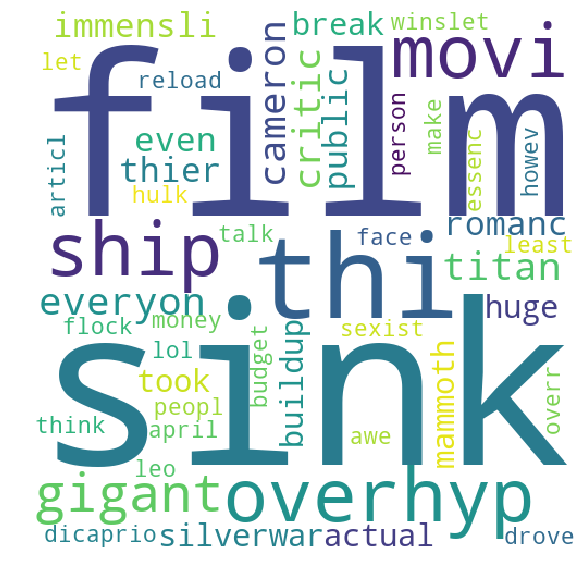

In [32]:
idx = 50
row = X_train_tfidf[idx]
terms = [(vocab_by_idx[row.indices[i]], row.data[i]) 
                 for i, term in enumerate(row.indices)]
top_terms= list(pd.Series(dict(terms))\
                .sort_values(ascending = False)[:50].index)
wc = WordCloud(background_color="white", 
    width=500, height=500, max_words=50).generate("+".join(top_terms))
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off");

In [33]:
%%time
lr = linear_model.LogisticRegression(C = 1.0, random_state = 1
                            , n_jobs = 8, solver="saga")
lr.fit(X_train_tfidf, y_train)
y_test_pred = lr.predict(X_test_tfidf)
print("accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

accuracy:  0.87852
CPU times: user 1.41 s, sys: 41 ms, total: 1.45 s
Wall time: 1.4 s


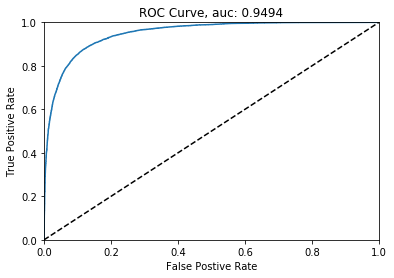

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,
                        lr.predict_proba(X_test_tfidf)[:, [1]])
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve, auc: %.4f" % auc);

In [35]:
%%time
from sklearn import naive_bayes, ensemble
bayes = naive_bayes.MultinomialNB(alpha=1)
bayes.fit(X_train_tfidf, y_train)
print("accuracy: ", bayes.score(X_test_tfidf, y_test))

accuracy:  0.8224
CPU times: user 73.1 ms, sys: 6.05 ms, total: 79.1 ms
Wall time: 71.8 ms


In [36]:
%%time
est = tree.DecisionTreeClassifier()
est.fit(X_train_tfidf, y_train)
print("accuracy: ", est.score(X_test_tfidf, y_test))

accuracy:  0.70716
CPU times: user 33.6 s, sys: 90.3 ms, total: 33.7 s
Wall time: 33.6 s
